In [220]:
import pandas, seaborn, scipy, numpy, matplotlib, collections, sklearn, math, seaborn
import sklearn.linear_model
import os


%matplotlib inline
from matplotlib import pyplot

# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

%matplotlib inline
%config InlineBackend.figure_format = 'png'

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
matplotlib.rc('text', usetex=False)
#reload(c)

pandas.set_option('display.max_rows', 50)
pandas.set_option('display.max_columns', 50)

def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')
    
def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0, plusminus=False, function=numpy.mean):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values, statistic=function)
    if numpy.nan in bars:
        return pattern % function(values)
    diff = (bars[1] - bars[0]) / 2
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2))
        diff = round_to_n(diff, 1)
    if plusminus:
        return (pattern + " $\\pm$ " + pattern) % (function(values), diff)
    return (pattern + " (" + pattern + "-" + pattern + ")") % ((function(values),) + bars)

def median_with_errorbars(values, decimals=0, plusminus=False, function=numpy.median):
    return mean_with_errorbars(values, decimals, plusminus, function)


In [235]:
cohort_df = pandas.read_csv("../additional-files/Additional File 1.csv")
cohort_df

time_since_last_chemo = """
AOCS-034	16
AOCS-064	14
AOCS-065	19
AOCS-086	86
AOCS-088	17
AOCS-091	7
AOCS-092	7
AOCS-093	8
AOCS-094	27
AOCS-095	6
AOCS-135	10
AOCS-137	7
AOCS-139	81
AOCS-150	113
AOCS-077	30
AOCS-106	18
AOCS-158	19
AOCS-162	21
AOCS-169	58
""".split()

time_since_last_chemo_df = []
while time_since_last_chemo:
    patient = time_since_last_chemo.pop(0)
    days = time_since_last_chemo.pop(0)
    time_since_last_chemo_df.append((patient, int(days)))

time_since_last_chemo_df = pandas.DataFrame(time_since_last_chemo_df, columns=["patient", "days since last chemo"])
time_since_last_chemo_df.index = time_since_last_chemo_df.patient
time_since_last_chemo_df

cohort_df = cohort_df.merge(time_since_last_chemo_df, left_on="donor", right_on="patient", how="outer")
cohort_df.loc[~cohort_df.treated, "days since last chemo"] = numpy.nan
cohort_df


,source_id,RNA_id,RNA biospecimen,DNA_id,DNA_biospecimen,specimen_type_description,CollectionPoint,SpecimenType,RNA data file,DNA_sample_string,icgc_sample_id,project_code,submitted_sample_id,icgc_specimen_id,submitted_specimen_id,icgc_donor_id,submitted_donor_id,analyzed_sample_interval,percentage_cellularity,level_of_cellularity,study,study_specimen_involved_in,specimen_type,specimen_type_other,specimen_interval,...,other snv expressed neoantigens,snv mutations,snv neoantigens,snv expressed neoantigens,mnv mutations,mnv neoantigens,mnv expressed neoantigens,indel mutations,indel neoantigens,indel expressed neoantigens,carboplatin,paclitaxel,liposomal doxorubicin,gemcitabine,cyclophosphamide,topotecan,cisplatin,olaparib,docetaxel,bevacizumab,etoposide,nab-paclitaxel,farletuzumab/placebo,patient,days since last chemo
0,AOCS-001-1-7,ICGCDBDE20130916001,AOCS-001-2-0,AOCS_001_ICGC_DBPC_20130205_002,AOCS-001-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_001_I...,ICGCDBPC20130205002,SA505244,OV-AU,AOCS-001-1-7,SP101515,AOCS-001-1,DO46325,AOCS-001,1895.0,73.0,61-80%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.293826,5686.0,104.0,71.0,0.010268,0.016393,0.000000,0.014925,0.131148,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN
1,AOCS-004-1-5,ICGCDBDE20130916003,AOCS-004-2-9,AOCS_004_ICGC_DBPC_20130205_004,AOCS-004-1-5,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_004_I...,ICGCDBPC20130205004,SA505270,OV-AU,AOCS-004-1-5,SP101519,AOCS-004-1,DO46327,AOCS-004,1350.0,77.0,61-80%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.519262,6587.0,48.0,20.0,0.008726,0.000000,0.000000,0.029851,0.172414,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN
2,AOCS-005-1-8,ICGCDBDE20130916004,AOCS-005-2-1,AOCS_005_ICGC_DBPC_20130205_006,AOCS-005-1-8,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_005_I...,ICGCDBPC20130205006,SA505282,OV-AU,AOCS-005-1-8,SP101521,AOCS-005-1,DO46328,AOCS-005,2128.0,90.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.373072,5582.0,60.0,36.0,0.005167,0.000000,0.000000,0.033898,0.000000,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN
3,AOCS-034-1-0,ICGCDBLG2010050402TR,AOCS-034-2-4,AOCS_034_ICGC_DBPC_20130205_009,AOCS-034-1-0,primary tumour,Primary,Tumour,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205009,SA505297,OV-AU,AOCS-034-1-0,SP101523,AOCS-034-1,DO46329,AOCS-034,1953.0,84.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.270322,6858.0,154.0,58.0,0.007520,0.005988,0.016949,0.051020,0.071856,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,AOCS-034,NaN
4,AOCS-034-3-8,ICGCDBDE20131122024,AOCS-034-4-1,AOCS_034_ICGC_DBPC_20130205_007,AOCS-034-3-8,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205007,SA505303,OV-AU,AOCS-034-3-8,SP101524,AOCS-034-13,DO46329,AOCS-034,110.0,99.0,>81%,NaN,NaN,Recurrent tumour - other,recurrent ascitic fluid,1597,...,0.497789,13091.0,259.0,123.0,0.010501,0.003731,0.008065,0.045752,0.029851,0.000000,True,True,True,True,False,True,False,False,False,False,False,False,False,AOCS-034,16.0
5,AOCS-055-1-7,ICGCDBDE20130916005,AOCS-055-2-0,AOCS_055_ICGC_DBPC_20130205_011,AOCS-055-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_055_I...,ICGCDBPC20130205011,SA505316,OV-AU,AOCS-055-1-7,SP101526,AOCS-055-1,DO46330,AOCS-055,2150.0,82.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.607863,14583.0,152.0,91.0,0.004165,0.000000,0.000000,0.013423,0.116279,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN
6,AOCS-056-1-X,ICGCDBLG2010062229TR,AOCS-056-2-3,AOCS_056_ICGC_DBPC_20130205_013,AOCS-056-1-X,primary tumour,Primary,Tumour,131206_EXTERN_0043_AC29RDACXX.nopd.AOCS_056_

In [283]:
list(cohort_df)

['source_id',
 'RNA_id',
 'RNA biospecimen',
 'DNA_id',
 'DNA_biospecimen',
 'specimen_type_description',
 'CollectionPoint',
 'SpecimenType',
 'RNA data file',
 'DNA_sample_string',
 'icgc_sample_id',
 'project_code',
 'submitted_sample_id',
 'icgc_specimen_id',
 'submitted_specimen_id',
 'icgc_donor_id',
 'submitted_donor_id',
 'analyzed_sample_interval',
 'percentage_cellularity',
 'level_of_cellularity',
 'study',
 'study_specimen_involved_in',
 'specimen_type',
 'specimen_type_other',
 'specimen_interval',
 'specimen_donor_treatment_type',
 'specimen_donor_treatment_type_other',
 'specimen_processing',
 'specimen_storage',
 'tumour_confirmed',
 'tumour_histological_type',
 'tumour_grading_system',
 'tumour_grade',
 'tumour_stage_system',
 'tumour_stage',
 'cohort',
 'donor',
 'tissue_type',
 'timepoint',
 'treated',
 'metastasis',
 'interval_days',
 'bam_filename_tumor_dna',
 'bam_filename_tumor_rna',
 'treated_paired',
 'timepoint_paired',
 'protein changing',
 'peptides',
 'expr

In [249]:
new_cohort_df = cohort_df.copy()

chemo_lines_df = pandas.read_excel("../data/relapse_cases_chemo_summary_updated.corrected.xlsx", sheetname=0)
#del chemo_lines_df["Unnamed: 5"]
chemo_lines_df

chemo_line_cols = set()
for _, row in chemo_lines_df.iterrows():
    drug = row["DRUG NAME"].lower()
    if drug in new_cohort_df.columns:
        col = "Lines of %s" % drug
        chemo_line_cols.add(col)
        lines = str(row["Number of lines of chemotherapy"])
        if "*" in lines:
            lines = float(lines.replace("*", "").replace("Surgery occurred during 1st line", "").strip()) - 0.5
        lines = float(lines)
        new_cohort_df.loc[
            (new_cohort_df.submitted_donor_id == row.submitted_donor_id) & (new_cohort_df.treated),
            col
        ] = lines

chemo_line_cols = sorted(chemo_line_cols)
new_cohort_df

total_lines_per_donor = chemo_lines_df.groupby("submitted_donor_id")["Total lines for patient"].mean()
new_cohort_df["total lines"] = new_cohort_df.submitted_donor_id.map(total_lines_per_donor)
new_cohort_df

,source_id,RNA_id,RNA biospecimen,DNA_id,DNA_biospecimen,specimen_type_description,CollectionPoint,SpecimenType,RNA data file,DNA_sample_string,icgc_sample_id,project_code,submitted_sample_id,icgc_specimen_id,submitted_specimen_id,icgc_donor_id,submitted_donor_id,analyzed_sample_interval,percentage_cellularity,level_of_cellularity,study,study_specimen_involved_in,specimen_type,specimen_type_other,specimen_interval,...,gemcitabine,cyclophosphamide,topotecan,cisplatin,olaparib,docetaxel,bevacizumab,etoposide,nab-paclitaxel,farletuzumab/placebo,patient,days since last chemo,Lines of carboplatin,Lines of paclitaxel,Lines of gemcitabine,Lines of liposomal doxorubicin,Lines of topotecan,Lines of cyclophosphamide,Lines of docetaxel,Lines of farletuzumab/placebo,Lines of etoposide,Lines of cisplatin,Lines of bevacizumab,Lines of olaparib,total lines
0,AOCS-001-1-7,ICGCDBDE20130916001,AOCS-001-2-0,AOCS_001_ICGC_DBPC_20130205_002,AOCS-001-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_001_I...,ICGCDBPC20130205002,SA505244,OV-AU,AOCS-001-1-7,SP101515,AOCS-001-1,DO46325,AOCS-001,1895.0,73.0,61-80%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AOCS-004-1-5,ICGCDBDE20130916003,AOCS-004-2-9,AOCS_004_ICGC_DBPC_20130205_004,AOCS-004-1-5,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_004_I...,ICGCDBPC20130205004,SA505270,OV-AU,AOCS-004-1-5,SP101519,AOCS-004-1,DO46327,AOCS-004,1350.0,77.0,61-80%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AOCS-005-1-8,ICGCDBDE20130916004,AOCS-005-2-1,AOCS_005_ICGC_DBPC_20130205_006,AOCS-005-1-8,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_005_I...,ICGCDBPC20130205006,SA505282,OV-AU,AOCS-005-1-8,SP101521,AOCS-005-1,DO46328,AOCS-005,2128.0,90.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AOCS-034-1-0,ICGCDBLG2010050402TR,AOCS-034-2-4,AOCS_034_ICGC_DBPC_20130205_009,AOCS-034-1-0,primary tumour,Primary,Tumour,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205009,SA505297,OV-AU,AOCS-034-1-0,SP101523,AOCS-034-1,DO46329,AOCS-034,1953.0,84.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,False,False,False,False,False,False,False,False,False,False,AOCS-034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,AOCS-034-3-8,ICGCDBDE20131122024,AOCS-034-4-1,AOCS_034_ICGC_DBPC_20130205_007,AOCS-034-3-8,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205007,SA505303,OV-AU,AOCS-034-3-8,SP101524,AOCS-034-13,DO46329,AOCS-034,110.0,99.0,>81%,NaN,NaN,Recurrent tumour - other,recurrent ascitic fluid,1597,...,True,False,True,False,False,False,False,False,False,False,AOCS-034,16.0,4.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
5,AOCS-055-1-7,ICGCDBDE20130916005,AOCS-055-2-0,AOCS_055_ICGC_DBPC_20130205_011,AOCS-055-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_055_I...,ICGCDBPC20130205011,SA505316,OV-AU,AOCS-055-1-7,SP101526,AOCS-055-1,DO46330,AOCS-055,2150.0,82.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AOCS-056-1-X,ICGCDBLG2010062229TR,AOCS-056-2-3,AOCS_056_ICGC_DBPC_20130205_013,AOCS-056-1-X,primary tumour,Primary,Tumour,131206_EXTERN_0043_AC29RDACXX.nopd.AOCS_056_IC...,ICGCDBPC20130205013,SA505328,OV-AU,AOCS-056-1-X,SP101528,AOCS-056-1,DO46331,AOCS-056,2108.0,94.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [259]:
new_cohort_df["total lines"].unique()

array([ nan,   5.,   4.,   2.,   1.,   7.,   8.,   6.,   3.])

In [250]:
", ".join(new_cohort_df.ix[(new_cohort_df.specific_treatment == "relapse/treated") & new_cohort_df["total lines"].isnull() ][
    "submitted_donor_id"].unique())

'AOCS-117, AOCS-119, AOCS-120, AOCS-134, AOCS-138, AOCS-141, AOCS-142, AOCS-155, AOCS-167'

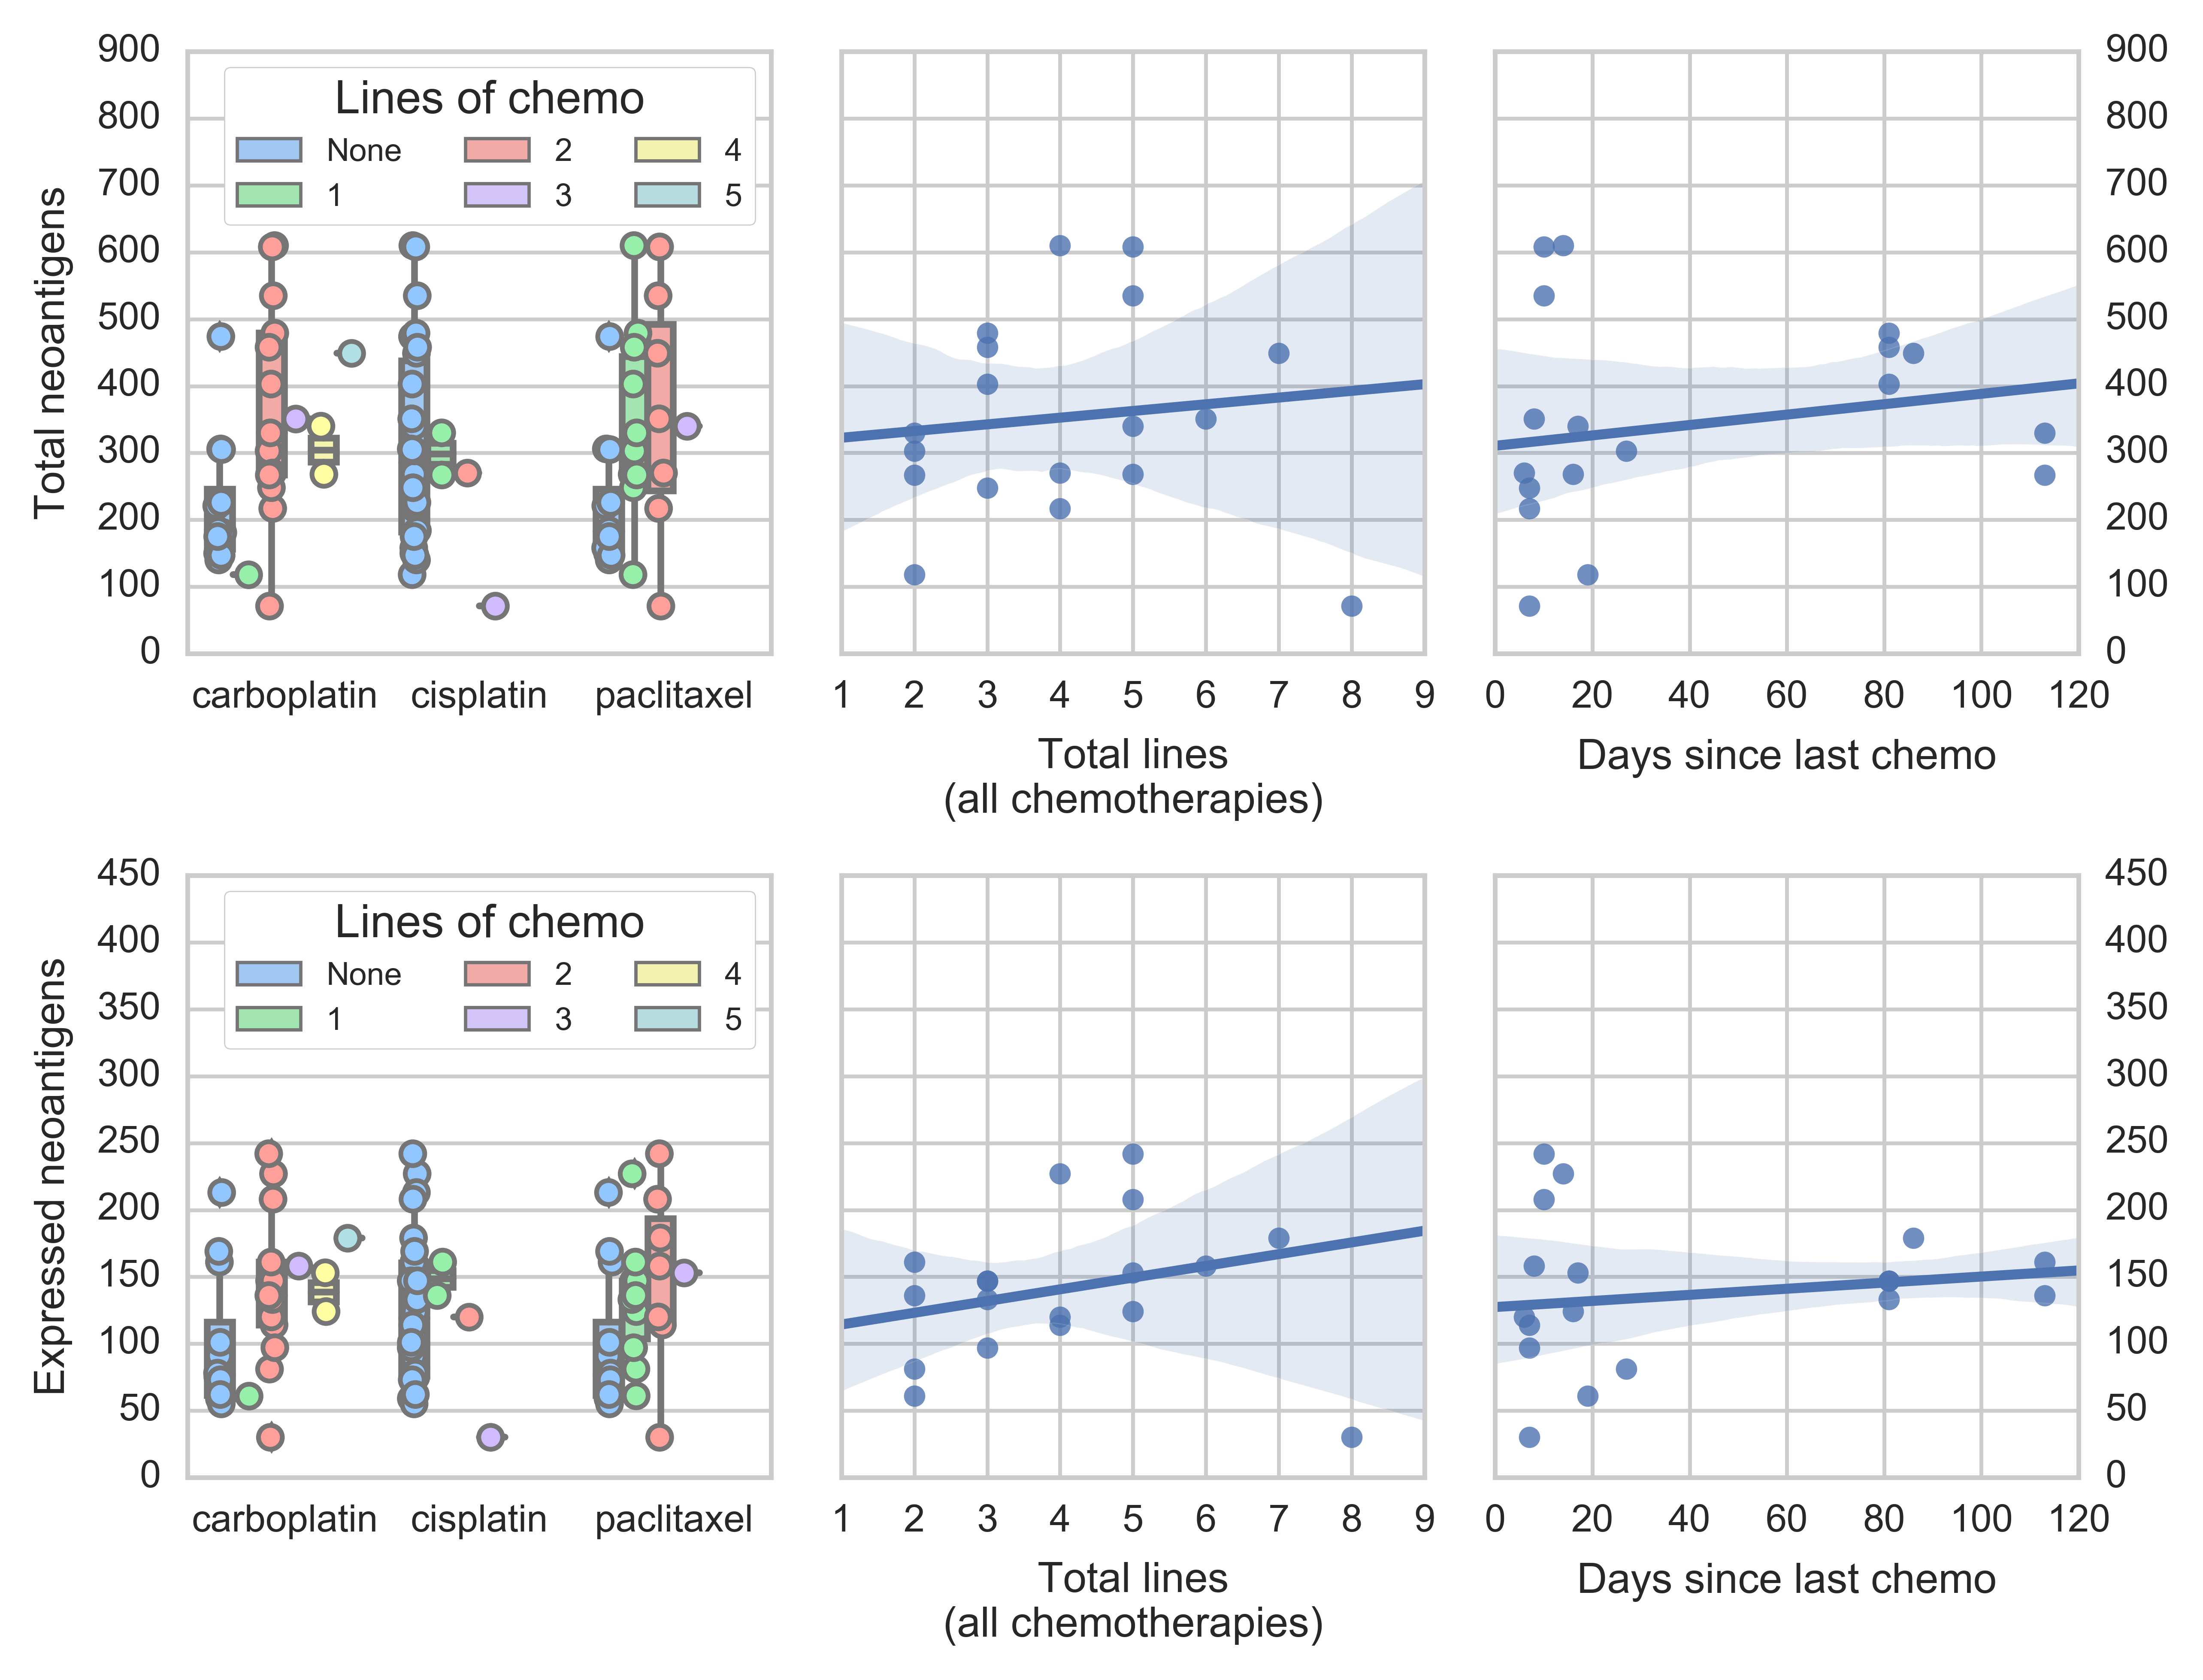

In [277]:
def maybe_int(s):
    try:
        return str(int(s))
    except ValueError:
        return str(s)


pyplot.figure(figsize=(6.5,5))

for row in range(2):
    if row == 0:
        y_col = "peptides"
        tick_points = range(0, 1000, 100)

    elif row == 1:
        y_col = "expressed peptides"
        tick_points = range(0, 500, 50)

    
    pyplot.subplot(2,3,1 + 3 * row)
    
    new_cohort_df.index = new_cohort_df.source_id

    sub_cohort_df = new_cohort_df.ix[new_cohort_df.specific_treatment == "relapse/treated"].copy()
    stacked = sub_cohort_df[[
            x for x in chemo_line_cols if sub_cohort_df[x].nunique() > 1
    ]].fillna(0).stack().to_frame().reset_index()

    stacked.columns = ["source_id", "chemo", "Lines of chemo"]
    stacked["chemo"] = stacked.chemo.str.replace("Lines of ", "")
    stacked["Lines of chemo"] = stacked["Lines of chemo"].map(
        lambda s: {0.0: "None", 0.5: "< 1"}.get(s, maybe_int(s)))
    stacked[y_col] = stacked.source_id.map(new_cohort_df[y_col])
    stacked

    palette = 'pastel'
    seaborn.set_context('paper')
    seaborn.set_style('whitegrid')
    hues = [
        x for x in ["None", "< 1", "1", "2", "3", "4", "5"]
        if x in stacked["Lines of chemo"].unique()
    ]
    seaborn.boxplot(
        data=stacked, x="chemo", y=y_col, hue="Lines of chemo", hue_order=hues, palette=palette, notch=False)
    seaborn.stripplot(
        data=stacked, x="chemo", y=y_col, hue="Lines of chemo", hue_order=hues, palette=palette, split=True, jitter=True, size=5, linewidth=1)
    pyplot.xlabel("")

    handles, labels = pyplot.gca().get_legend_handles_labels()
    pyplot.legend(
        handles[:6],
        labels[:6],
        ncol=3,
        loc="upper right",
        title="Lines of chemo",
        frameon=True,
        fancybox=True,
        fontsize="x-small")
    #pyplot.suptitle("relapse/treated samples")
    pyplot.ylabel("Total neoantigens" if row == 0 else "Expressed neoantigens")
    pyplot.yticks(tick_points)

    ax = pyplot.subplot(2,3,2 + 3 * row)
    seaborn.regplot(
        data=new_cohort_df.ix[(new_cohort_df.specific_treatment == "relapse/treated") & (new_cohort_df["total lines"] < 800)],
        x="total lines",
        y=y_col,
        robust=True,
    )
    ax.yaxis.tick_right()
    pyplot.ylabel("")
    pyplot.xlabel("Total lines\n(all chemotherapies)")
    pyplot.yticks(tick_points, [""] * len(tick_points))


    ax = pyplot.subplot(2,3,3 + 3 * row)
    seaborn.regplot(
        data=new_cohort_df.ix[new_cohort_df.treated & (new_cohort_df.specific_treatment == "relapse/treated")],
        x="days since last chemo",
        y=y_col,
        robust=True,
    )
    pyplot.yticks(tick_points)
    pyplot.xlabel("Days since last chemo")
    ax.yaxis.tick_right()
    pyplot.ylabel("")

pyplot.tight_layout()
#pyplot.savefig("../figures/chemo_lines.pdf")

In [279]:
new_cohort_df.ix[new_cohort_df["total lines"] >= 8]

,source_id,RNA_id,RNA biospecimen,DNA_id,DNA_biospecimen,specimen_type_description,CollectionPoint,SpecimenType,RNA data file,DNA_sample_string,icgc_sample_id,project_code,submitted_sample_id,icgc_specimen_id,submitted_specimen_id,icgc_donor_id,submitted_donor_id,analyzed_sample_interval,percentage_cellularity,level_of_cellularity,study,study_specimen_involved_in,specimen_type,specimen_type_other,specimen_interval,...,cyclophosphamide,topotecan,cisplatin,olaparib,docetaxel,bevacizumab,etoposide,nab-paclitaxel,farletuzumab/placebo,patient,days since last chemo,Lines of carboplatin,Lines of paclitaxel,Lines of gemcitabine,Lines of liposomal doxorubicin,Lines of topotecan,Lines of cyclophosphamide,Lines of docetaxel,Lines of farletuzumab/placebo,Lines of etoposide,Lines of cisplatin,Lines of bevacizumab,Lines of olaparib,total lines,total chemo rounds
source_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-092-1-6,AOCS-092-1-6,ICGCDBDE20131122027,AOCS-092-2-X,AOCS_092_ICGC_DBPC_20130205_061,AOCS-092-1-6,primary tumour,Primary,Tumour,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_092_IC...,ICGCDBPC20130205061,SA505676,OV-AU,AOCS-092-1-6,SP101628,AOCS-092-1,DO46374,AOCS-092,963.0,83.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,False,False,False,False,False,False,False,False,False,AOCS-092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.0
AOCS-092-3-3,AOCS-092-3-3,ICGCDBDE20131122028,AOCS-092-4-7,AOCS_092_ICGC_DBPC_20130205_059,AOCS-092-3-3,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_092_IC...,ICGCDBPC20130205059,SA505685,OV-AU,AOCS-092-3-3,SP101630,AOCS-092-13,DO46374,AOCS-092,63.0,89.0,>81%,NaN,NaN,Recurrent tumour - other,recurrent ascitic fluid,1370,...,False,True,True,False,True,False,True,False,False,AOCS-092,7.0,2.0,2.0,1.0,1.0,1.0,NaN,1.0,NaN,2.0,3.0,NaN,NaN,8.0,13.0


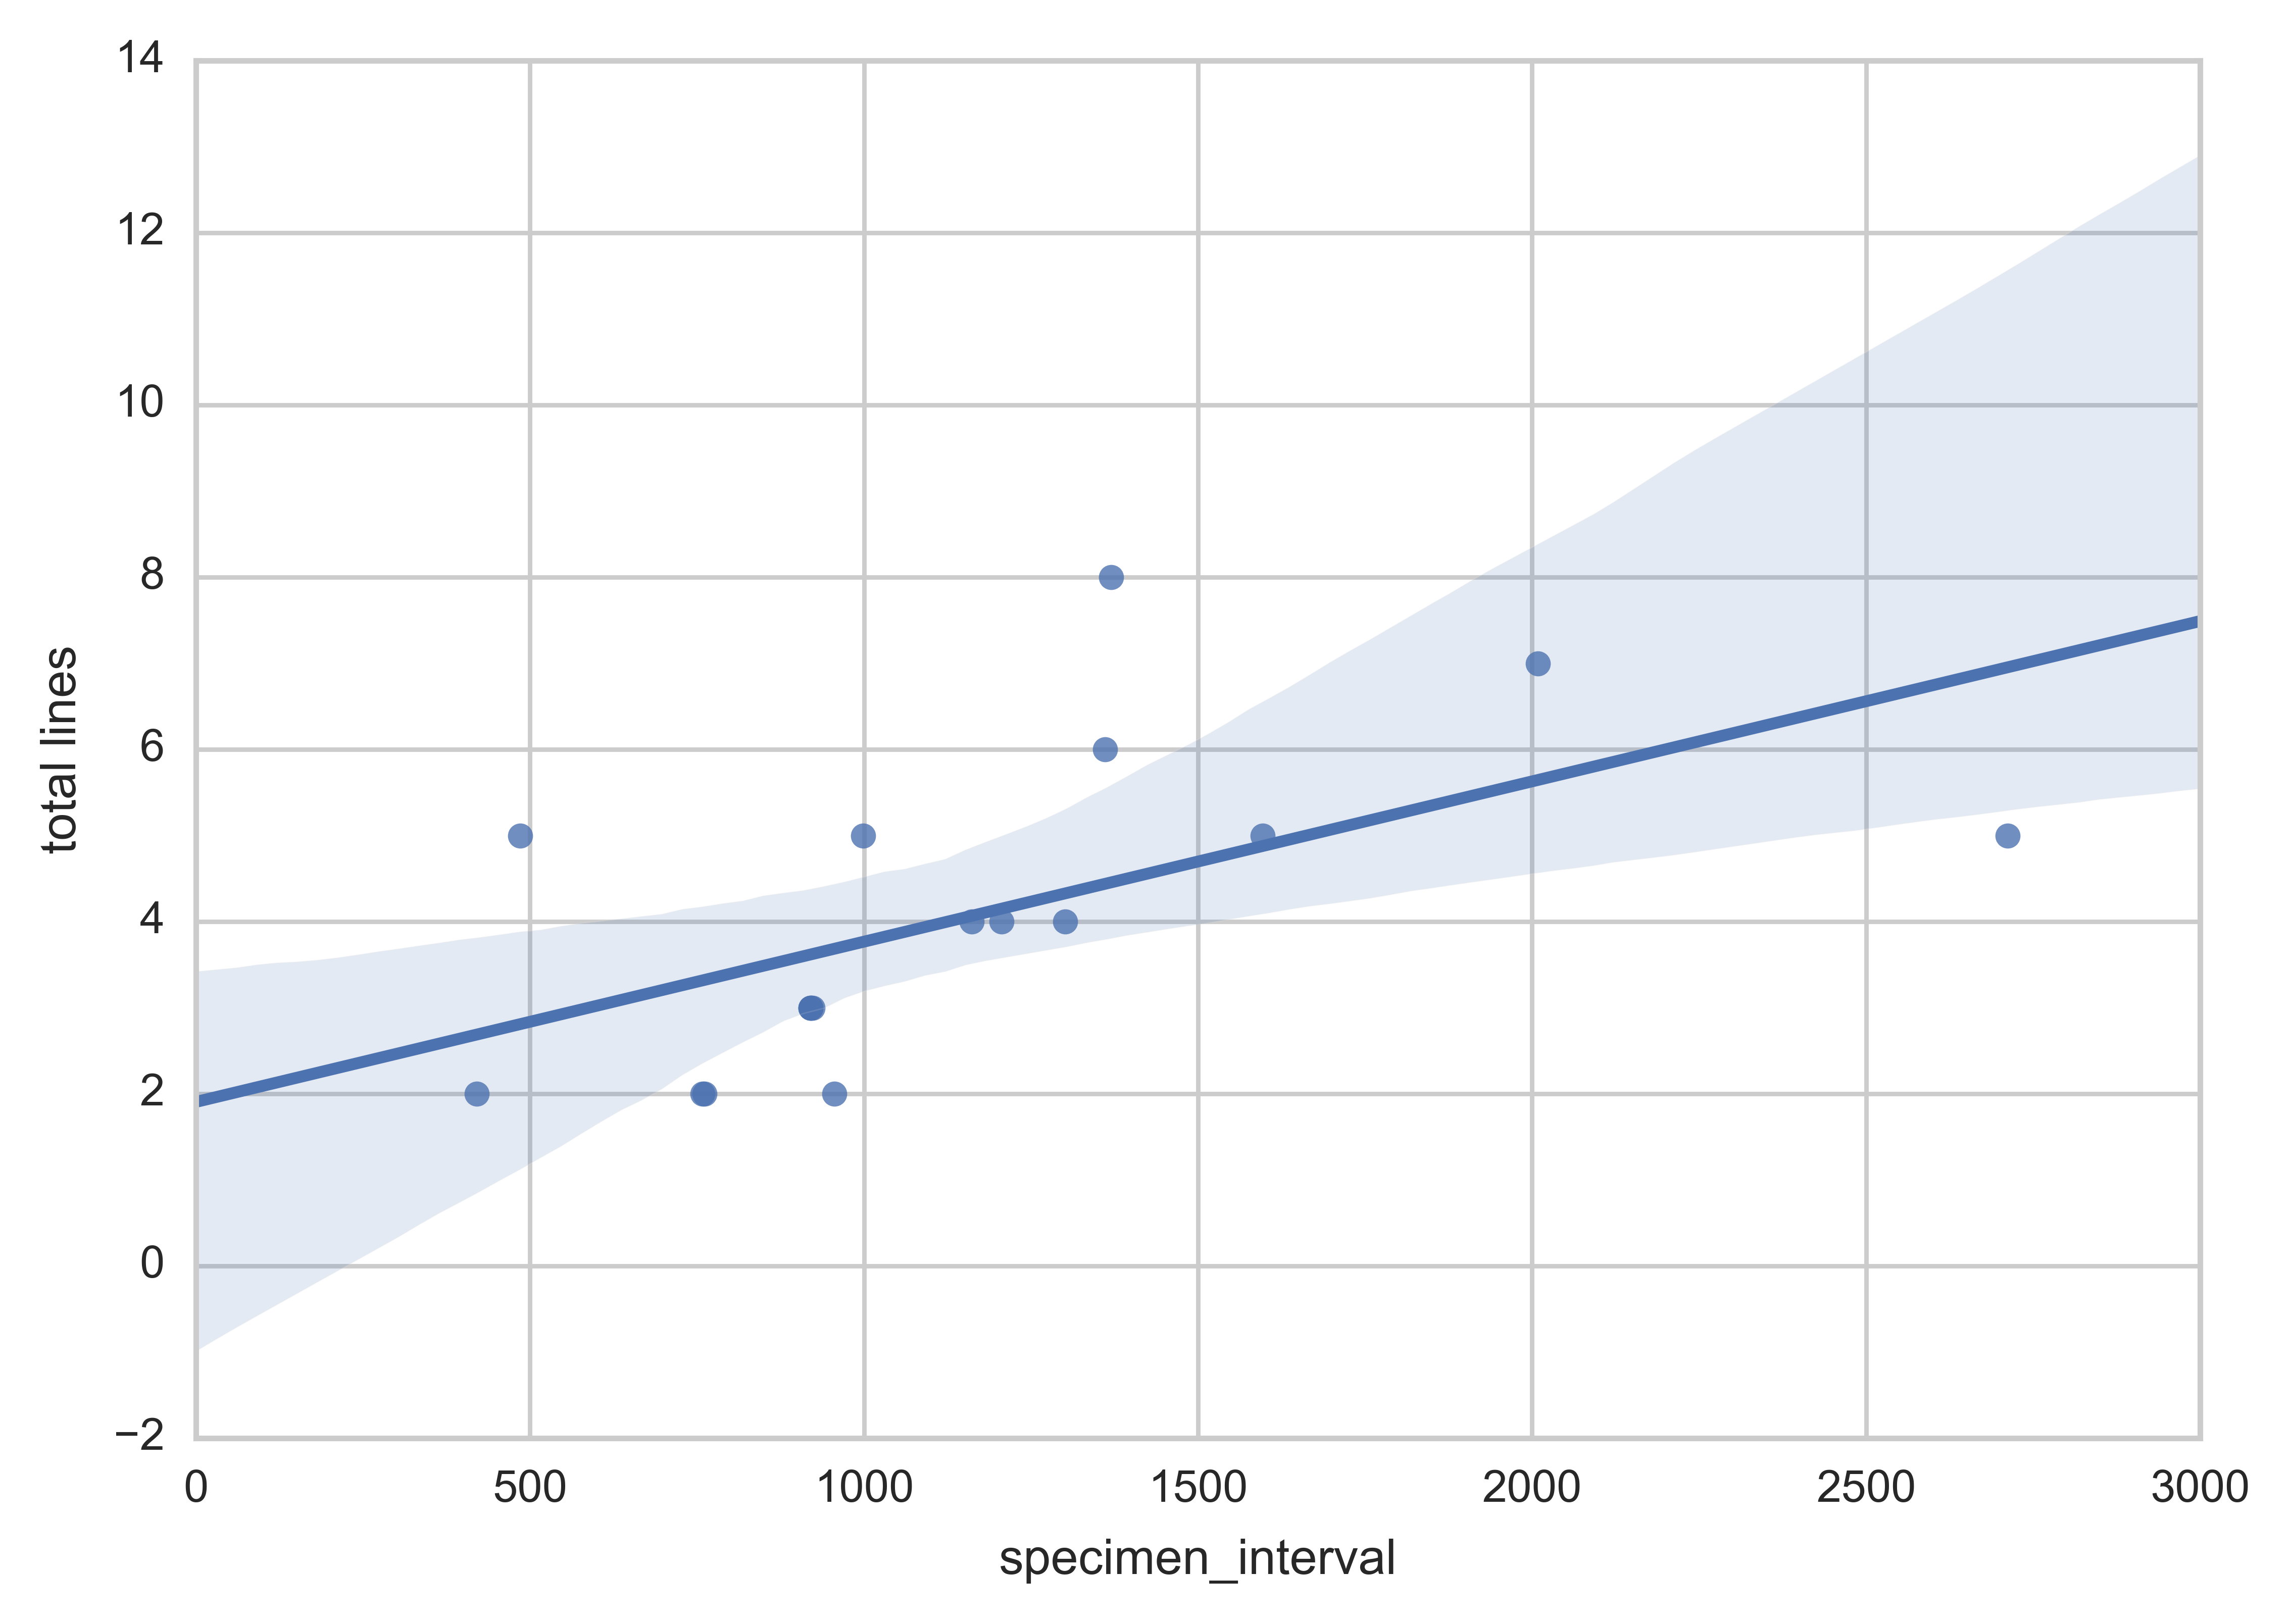

In [280]:
new_cohort_df[["source_id", "analyzed_sample_interval"]]
new_cohort_df.groupby("specific_treatment").specimen_interval.median()
#list(new_cohort_df)
seaborn.regplot(
    data=new_cohort_df.ix[new_cohort_df.specific_treatment == "relapse/treated"],
    x="specimen_interval",
    y="total lines")

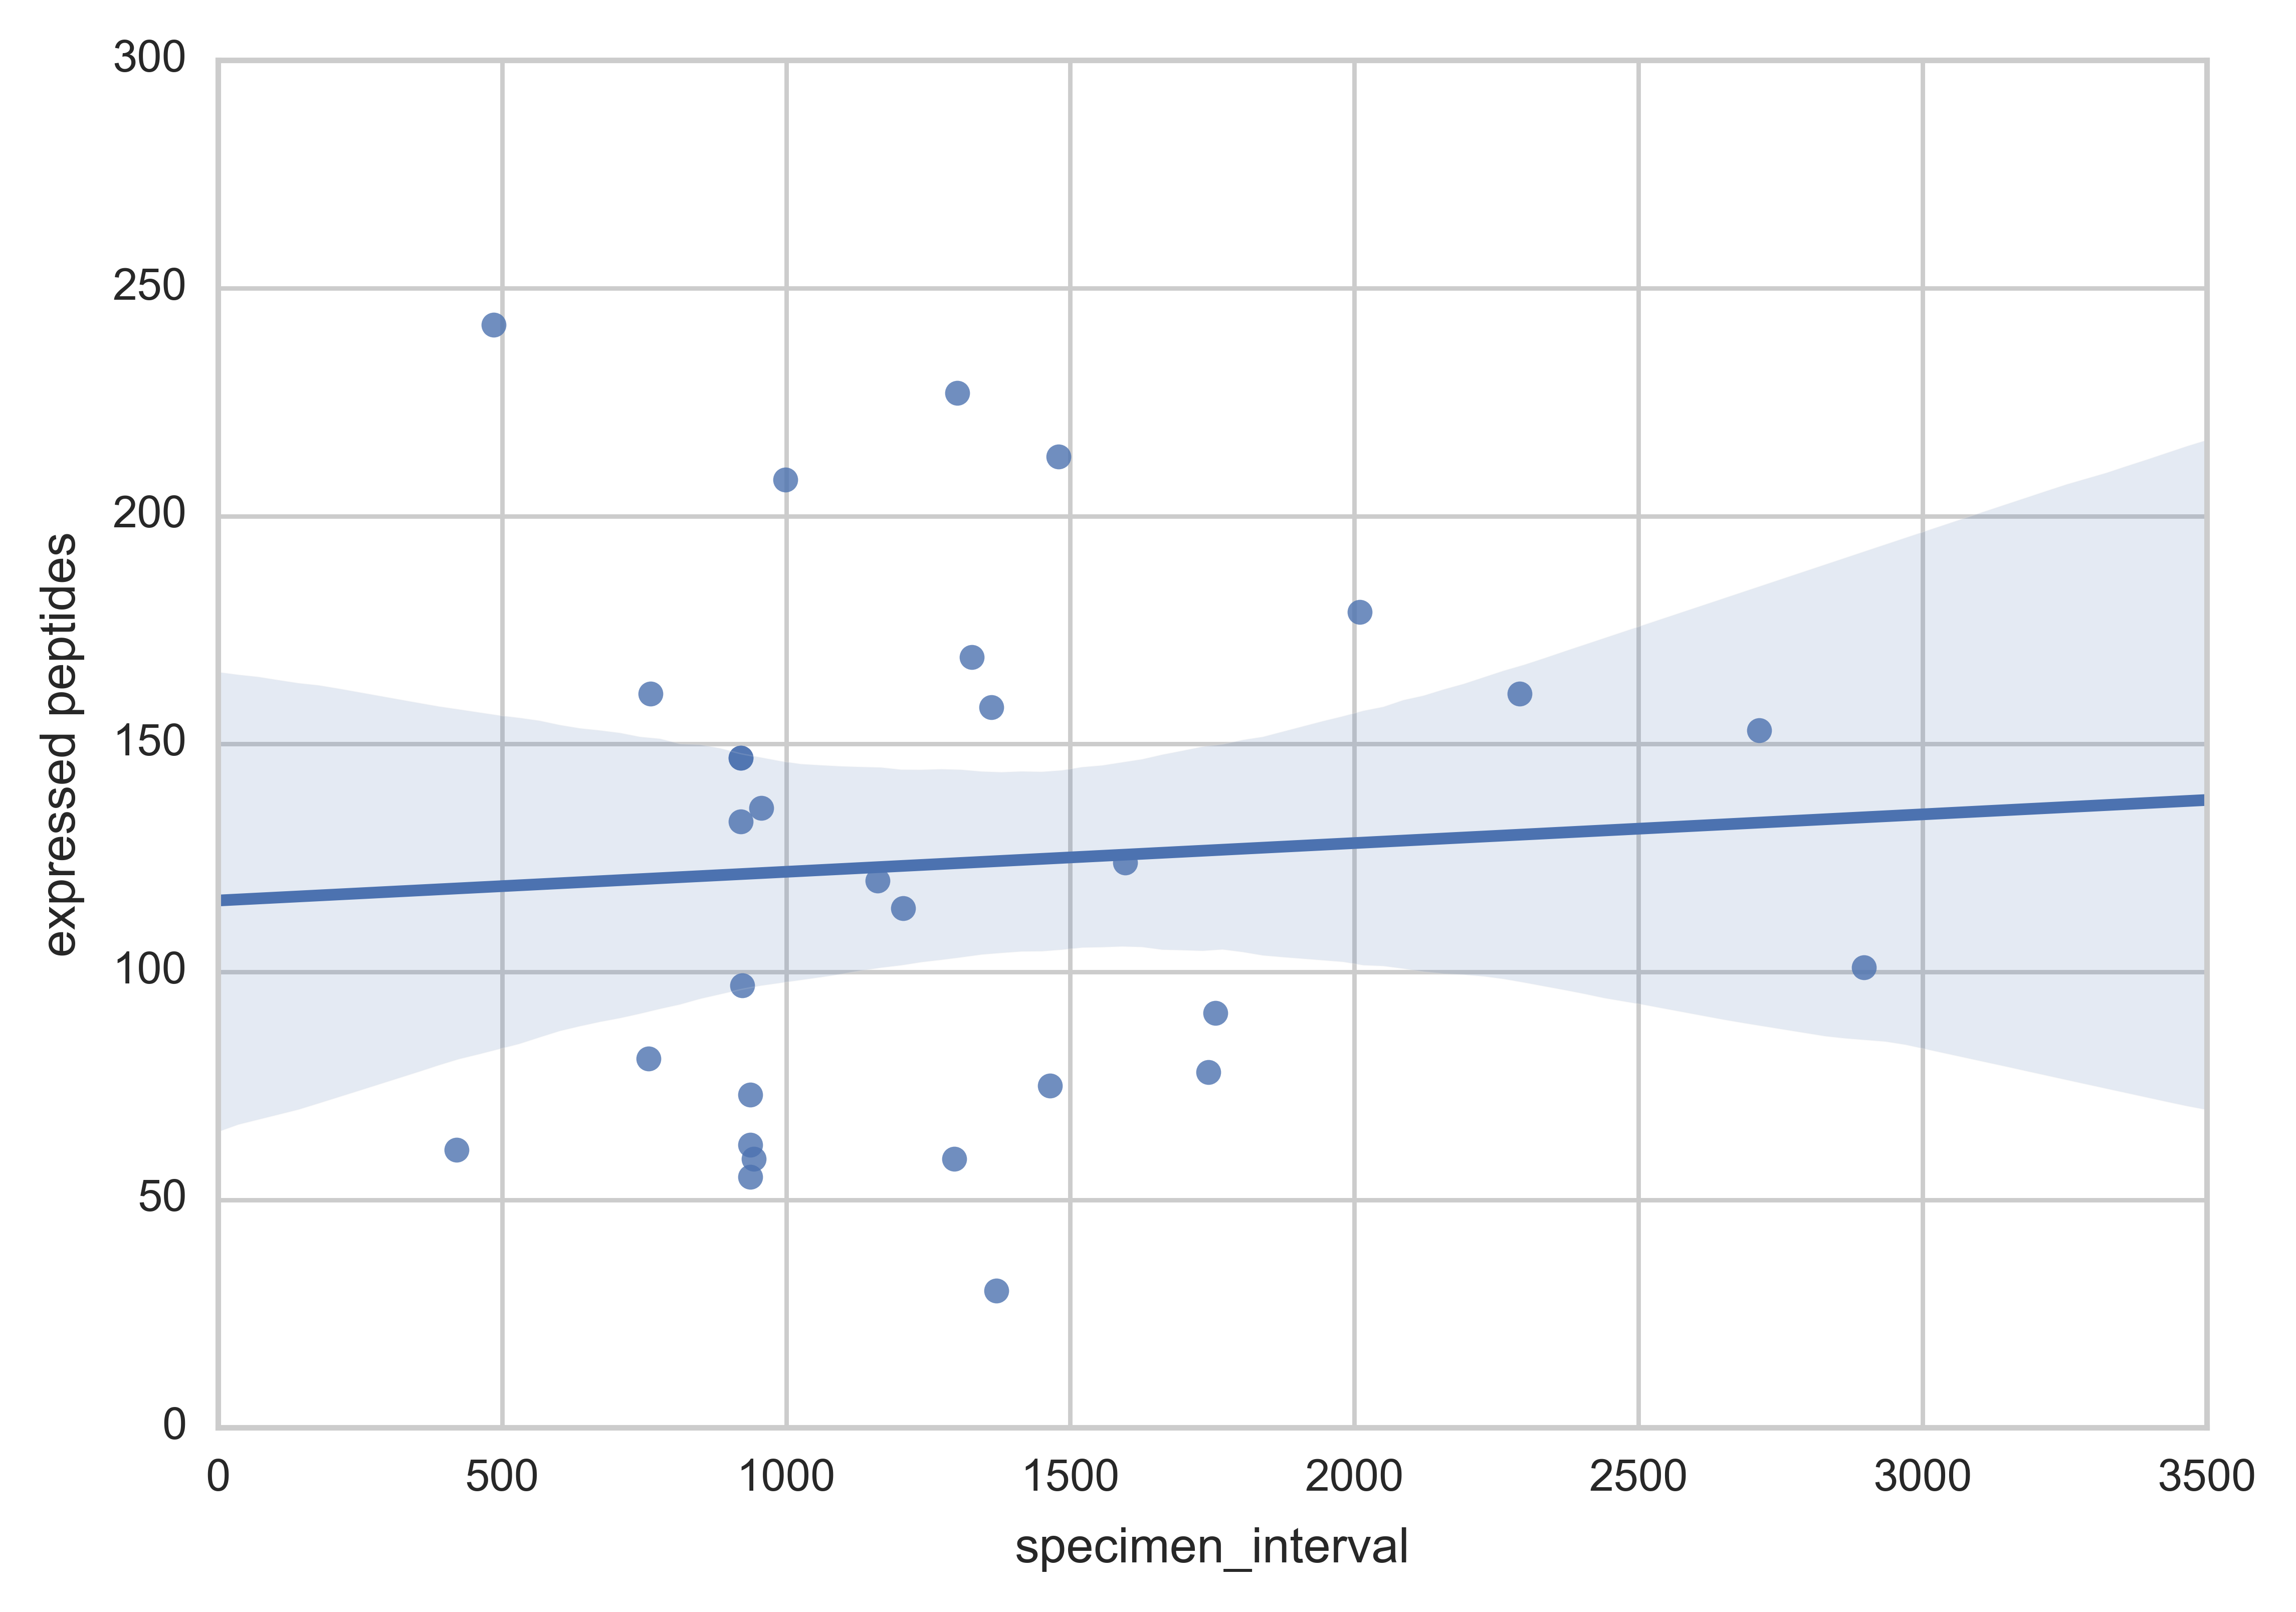

In [281]:
seaborn.regplot(
    data=new_cohort_df.ix[new_cohort_df.specific_treatment == "relapse/treated"],
    x="specimen_interval",
    y="expressed peptides")

In [297]:
new_cohort_df.ix[
    (new_cohort_df["Lines of platinum"] == 0)
    & (new_cohort_df["specific_treatment"] == "relapse/treated")
]

,source_id,RNA_id,RNA biospecimen,DNA_id,DNA_biospecimen,specimen_type_description,CollectionPoint,SpecimenType,RNA data file,DNA_sample_string,icgc_sample_id,project_code,submitted_sample_id,icgc_specimen_id,submitted_specimen_id,icgc_donor_id,submitted_donor_id,analyzed_sample_interval,percentage_cellularity,level_of_cellularity,study,study_specimen_involved_in,specimen_type,specimen_type_other,specimen_interval,...,topotecan,cisplatin,olaparib,docetaxel,bevacizumab,etoposide,nab-paclitaxel,farletuzumab/placebo,patient,days since last chemo,Lines of carboplatin,Lines of paclitaxel,Lines of gemcitabine,Lines of liposomal doxorubicin,Lines of topotecan,Lines of cyclophosphamide,Lines of docetaxel,Lines of farletuzumab/placebo,Lines of etoposide,Lines of cisplatin,Lines of bevacizumab,Lines of olaparib,total lines,total chemo rounds,Lines of platinum
source_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-117-3-3,AOCS-117-3-3,EXTERNAOCS20140414002,AOCS-117-4-7,AOCS_117_ICGC_DBPC_20130714_001,AOCS-117-3-3,recurrent ascitic fluid,Recurrence,Ascites,140414_EXTERN_0192_C42UFACXX.nopd.AOCS_117_EXT...,ICGCDBPC20130714001,SA505245,OV-AU,AOCS-117-3-3,SP101724,AOCS-117-13,DO46416,AOCS-117,94.0,99.0,>81%,PCAWG,PCAWG,Recurrent tumour - other,recurrent ascitic fluid,1755,...,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
AOCS-119-3-9,AOCS-119-3-9,ICGCDBDE20130916028,AOCS-119-4-2,AOCS_119_ICGC_DBPC_20130205_097,AOCS-119-3-9,recurrent ascitic fluid,Recurrence,Ascites,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_119_I...,ICGCDBPC20130205097,SA505258,OV-AU,AOCS-119-3-9,SP101732,AOCS-119-13,DO46420,AOCS-119,40.0,73.0,61-80%,PCAWG,PCAWG,Recurrent tumour - other,recurrent ascitic fluid,1296,...,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
AOCS-120-3-6,AOCS-120-3-6,ICGCDBDE20130916029,AOCS-120-4-X,AOCS_120_ICGC_DBPC_20130205_099,AOCS-120-3-6,recurrent ascitic fluid,Recurrence,Ascites,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_120_I...,ICGCDBPC20130205099,SA505271,OV-AU,AOCS-120-3-6,SP101740,AOCS-120-13,DO46424,AOCS-120,84.0,93.0,>81%,PCAWG,PCAWG,Recurrent tumour - other,recurrent ascitic fluid,2291,...,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
AOCS-134-3-9,AOCS-134-3-9,ICGCDBDE20131122020,AOCS-134-4-2,AOCS_134_ICGC_DBPC_20130205_134,AOCS-134-3-9,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0044_AC2JWTACXX.nopd.AOCS_134_IC...,ICGCDBPC20130205134,SA505415,OV-AU,AOCS-134-3-9,SP101845,AOCS-134-13,DO46473,AOCS-134,964.0,74.0,61-80%,PCAWG,PCAWG,Recurrent tumour - other,recurrent ascitic fluid,1479,...,False,True,False,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
AOCS-138-3-X,AOCS-138-3-X,ICGCDBDE20130916038,AOCS-138-4-3,AOCS_138_ICGC_DBPC_20130205_146,AOCS-138-3-X,recurrent ascitic fluid,Recurrence,Ascites,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_138_I...,ICGCDBPC20130205146,SA505478,OV-AU,AOCS-138-3-X,SP101881,AOCS-138-13,DO46488,AOCS-138,12.0,76.0,61-80%,PCAWG,PCAWG,Recurrent tumour - other,recurrent ascitic fluid,1327,...,False,False,True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
AOCS-141-3-2,AOCS-141-3-2,ICGCDBDE20131122021,AOCS-141-4-6,AOCS_141_ICGC_DBPC_20130205_153,AOCS-141-3-2,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0044_AC2JWTACXX.nopd.AOCS_141_IC...,ICGCDBPC20130205153,SA505528,OV-AU,AOCS-141-3-2,SP101916,AOCS-141-13,DO46498,AOCS-141,27.0,97.0,>81%,NaN,NaN,Recurrent tumour - other,recurrent ascitic fluid,1464,...,False,False,False,False,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
AOCS-141-8-0,AOCS-141-8-0,EXTERNAOCS20140414003,AOCS-141-10-8,AOCS_141_ICGC_DBDE_20131003_002,AOCS-141-8-0,recurrent ascitic fluid 2,Recurrence,Ascites,140414_EXTERN_0192_C

In [302]:
new_cohort_df["Lines of platinum"] = new_cohort_df["Lines of cisplatin"].fillna(0) + new_cohort_df["Lines of carboplatin"].fillna(0)
seaborn.regplot(
    data=new_cohort_df.ix[new_cohort_df.specific_treatment == "relapse/treated"],
    x="Lines of platinum",
    y='Cisplatin Gallus Gallus mutations',
)

KeyError: 'Cisplatin Gallus Gallus mutations'

In [332]:
new_cohort_df.ix[
    (new_cohort_df.specific_treatment == "relapse/treated")
    & (new_cohort_df.tissue_type == "solid")
].mutations_per_mb

source_id
AOCS-094-6-X     4.462025
AOCS-139-12-5    5.720187
AOCS-139-19-0    6.691872
AOCS-139-6-3     5.464690
AOCS-167-13-9    2.880413
AOCS-167-16-X    3.033977
Name: mutations_per_mb, dtype: float64

In [322]:
cohort_df.ix[cohort_df.cisplatin].donor.nunique()
cohort_df.ix[cohort_df.cyclophosphamide].donor.nunique()
cohort_df.ix[cohort_df.carboplatin].donor.nunique()


28

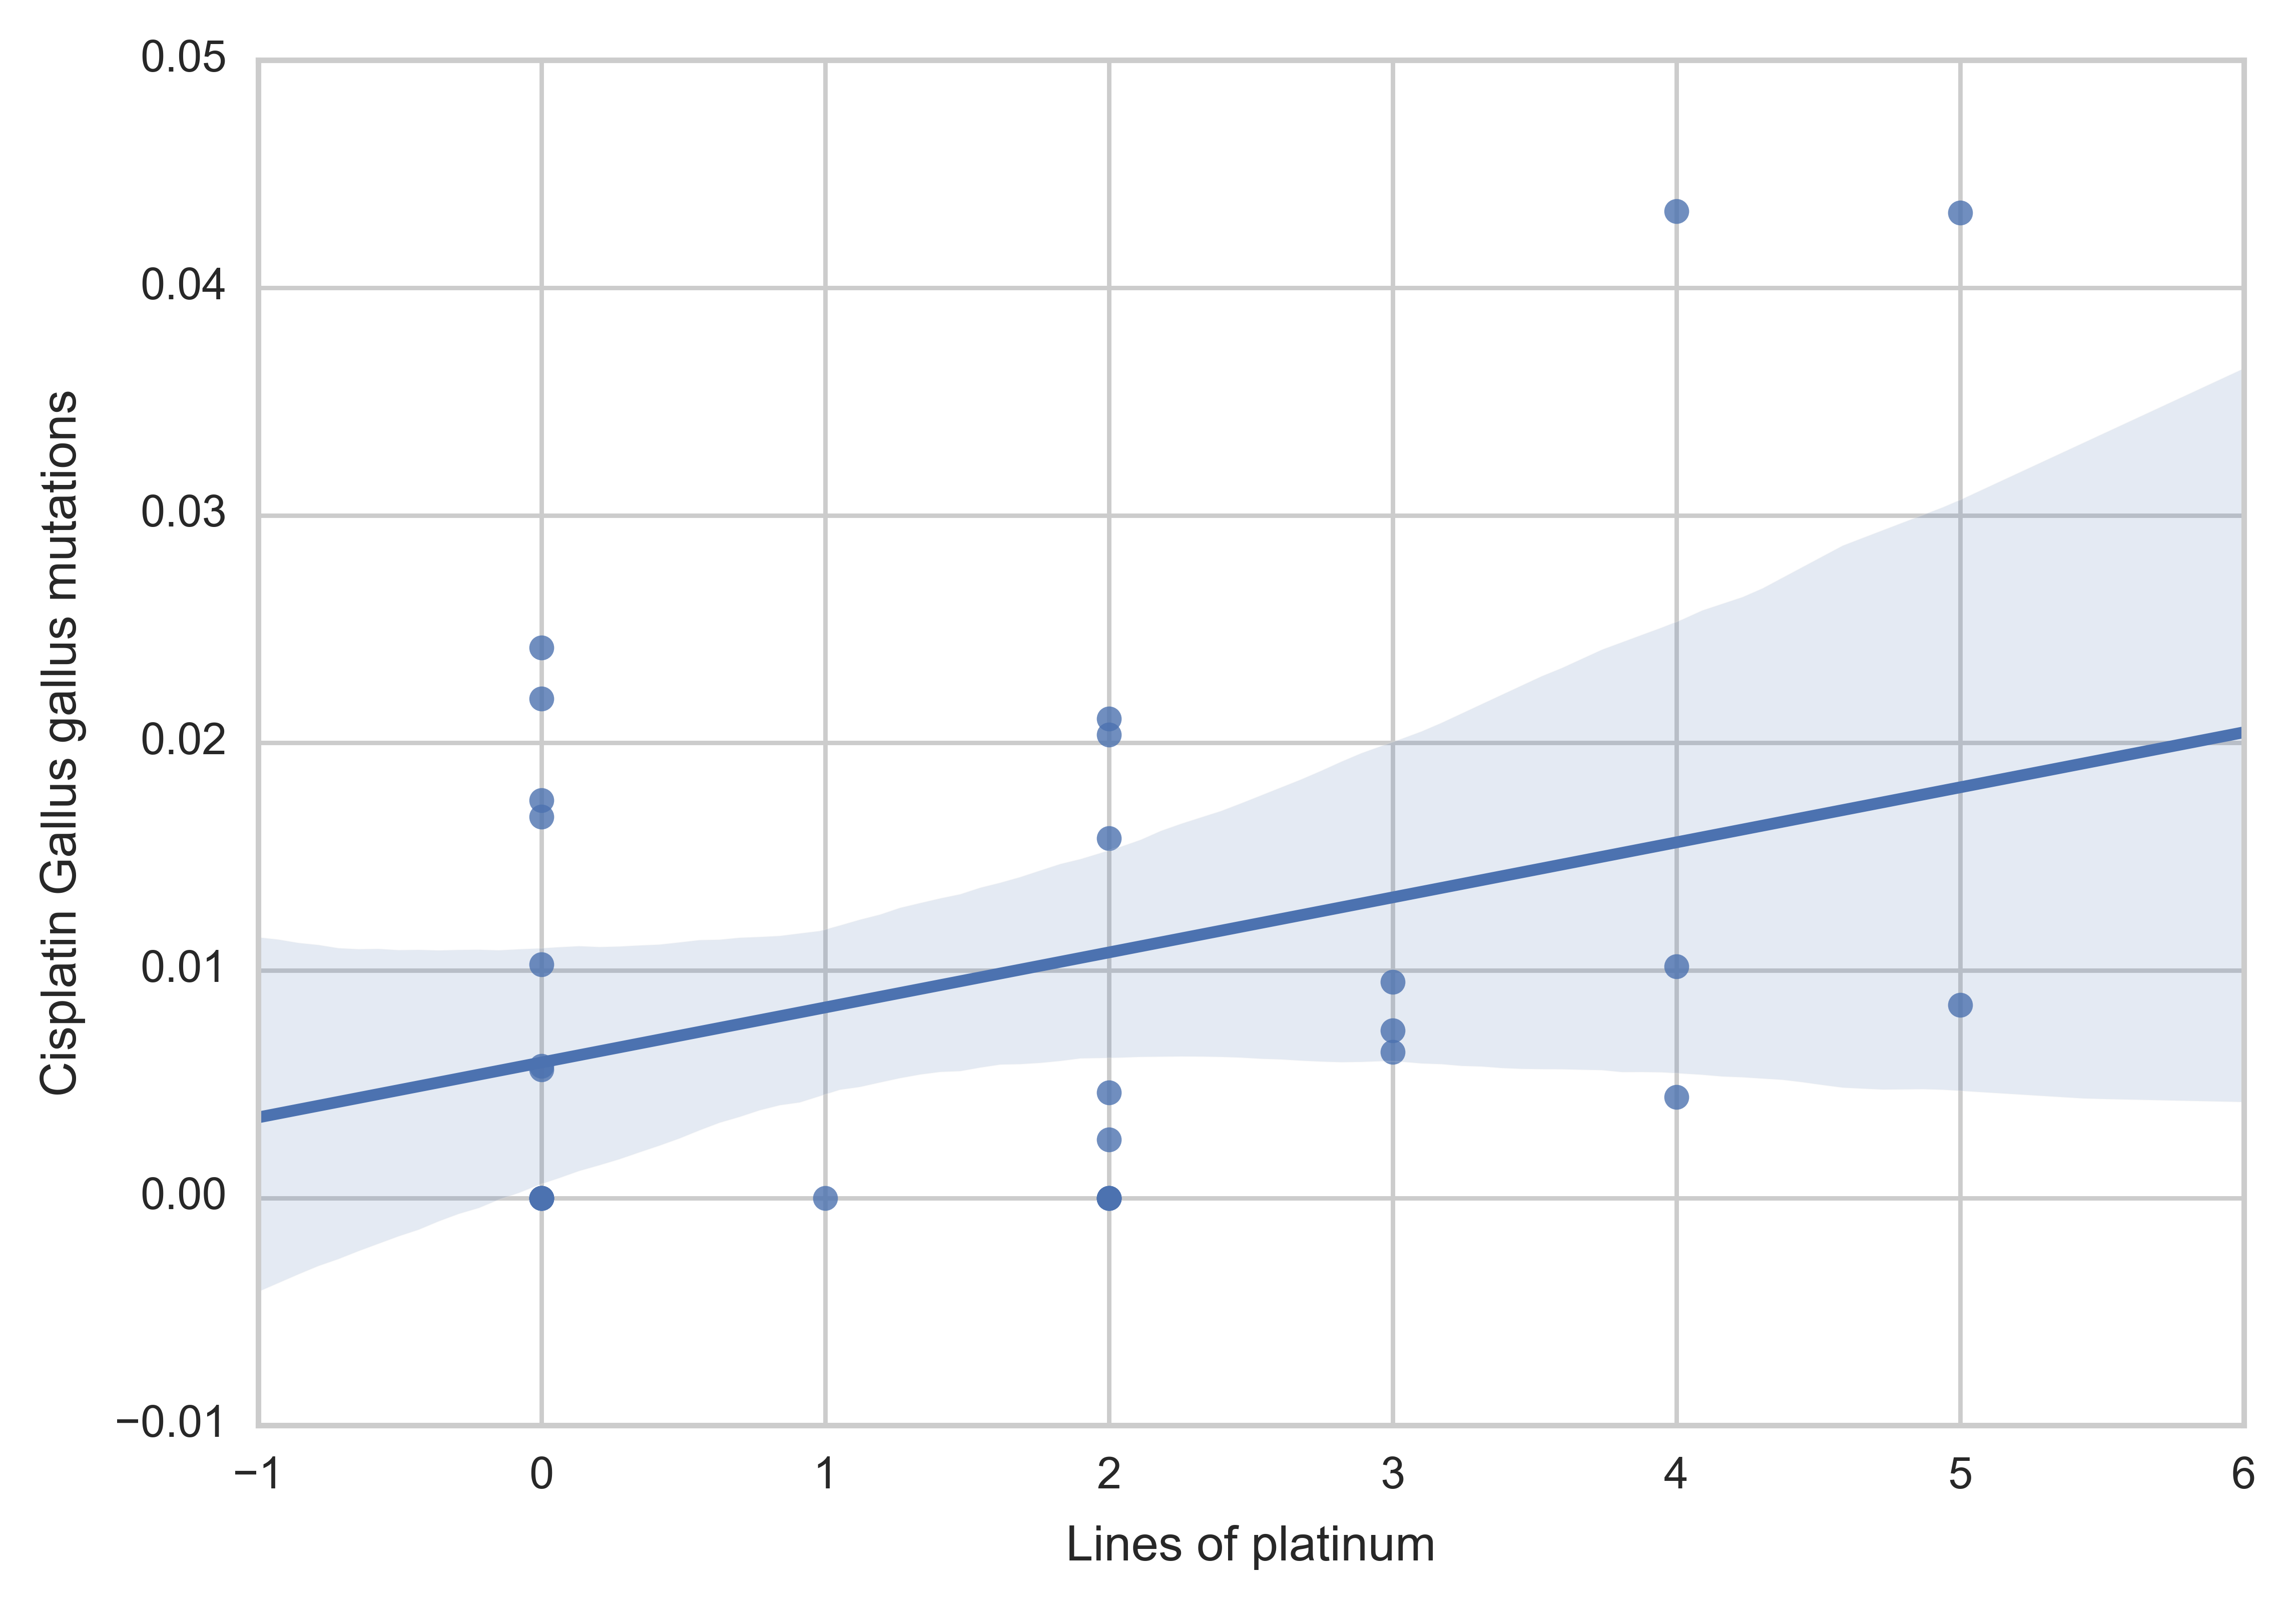

In [305]:
seaborn.regplot(
    data=new_cohort_df.ix[new_cohort_df.specific_treatment == "relapse/treated"],
    x="Lines of platinum",
    y='Cisplatin Gallus gallus mutations',
)

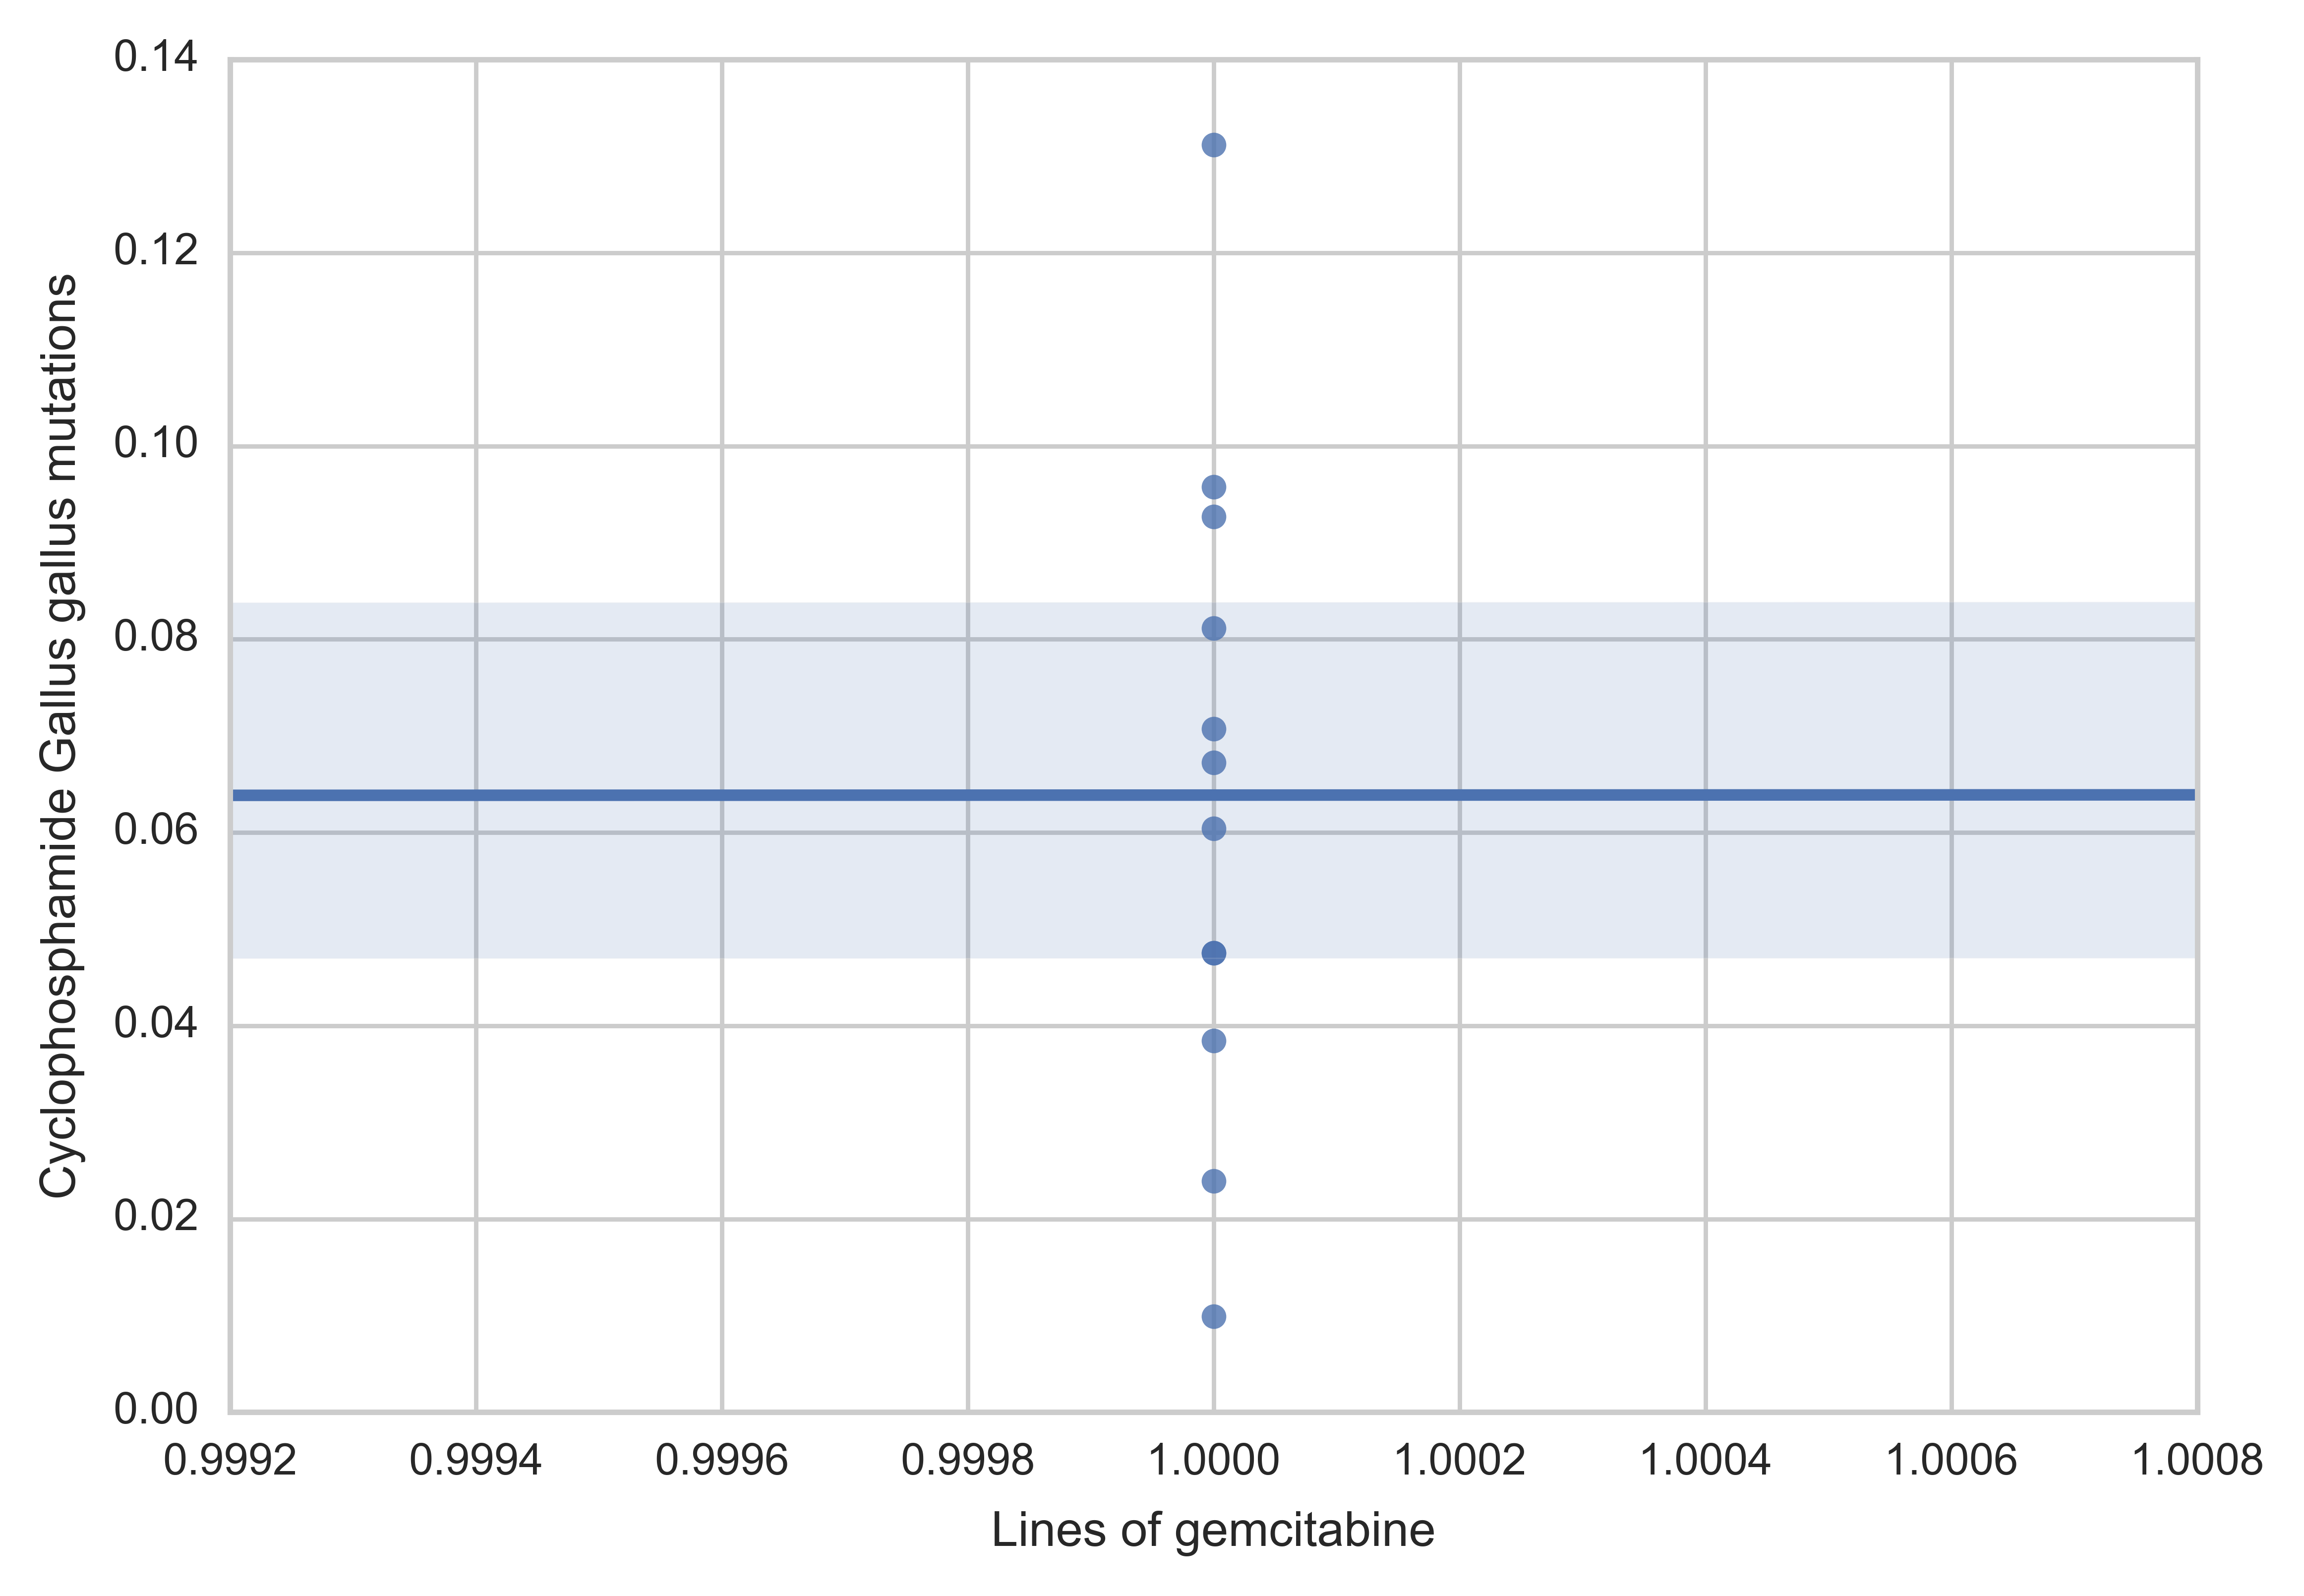

In [307]:
seaborn.regplot(
    data=new_cohort_df.ix[new_cohort_df.specific_treatment == "relapse/treated"],
    x="Lines of gemcitabine",
    y='Cyclophosphamide Gallus gallus mutations',
)

In [264]:
new_cohort_df["total lines"].unique()

array([ nan,   5.,   4.,   2.,   1.,   7.,   8.,   6.,   3.])

In [219]:
(new_cohort_df["days since last chemo"].dropna() <= 7).shape

(23,)

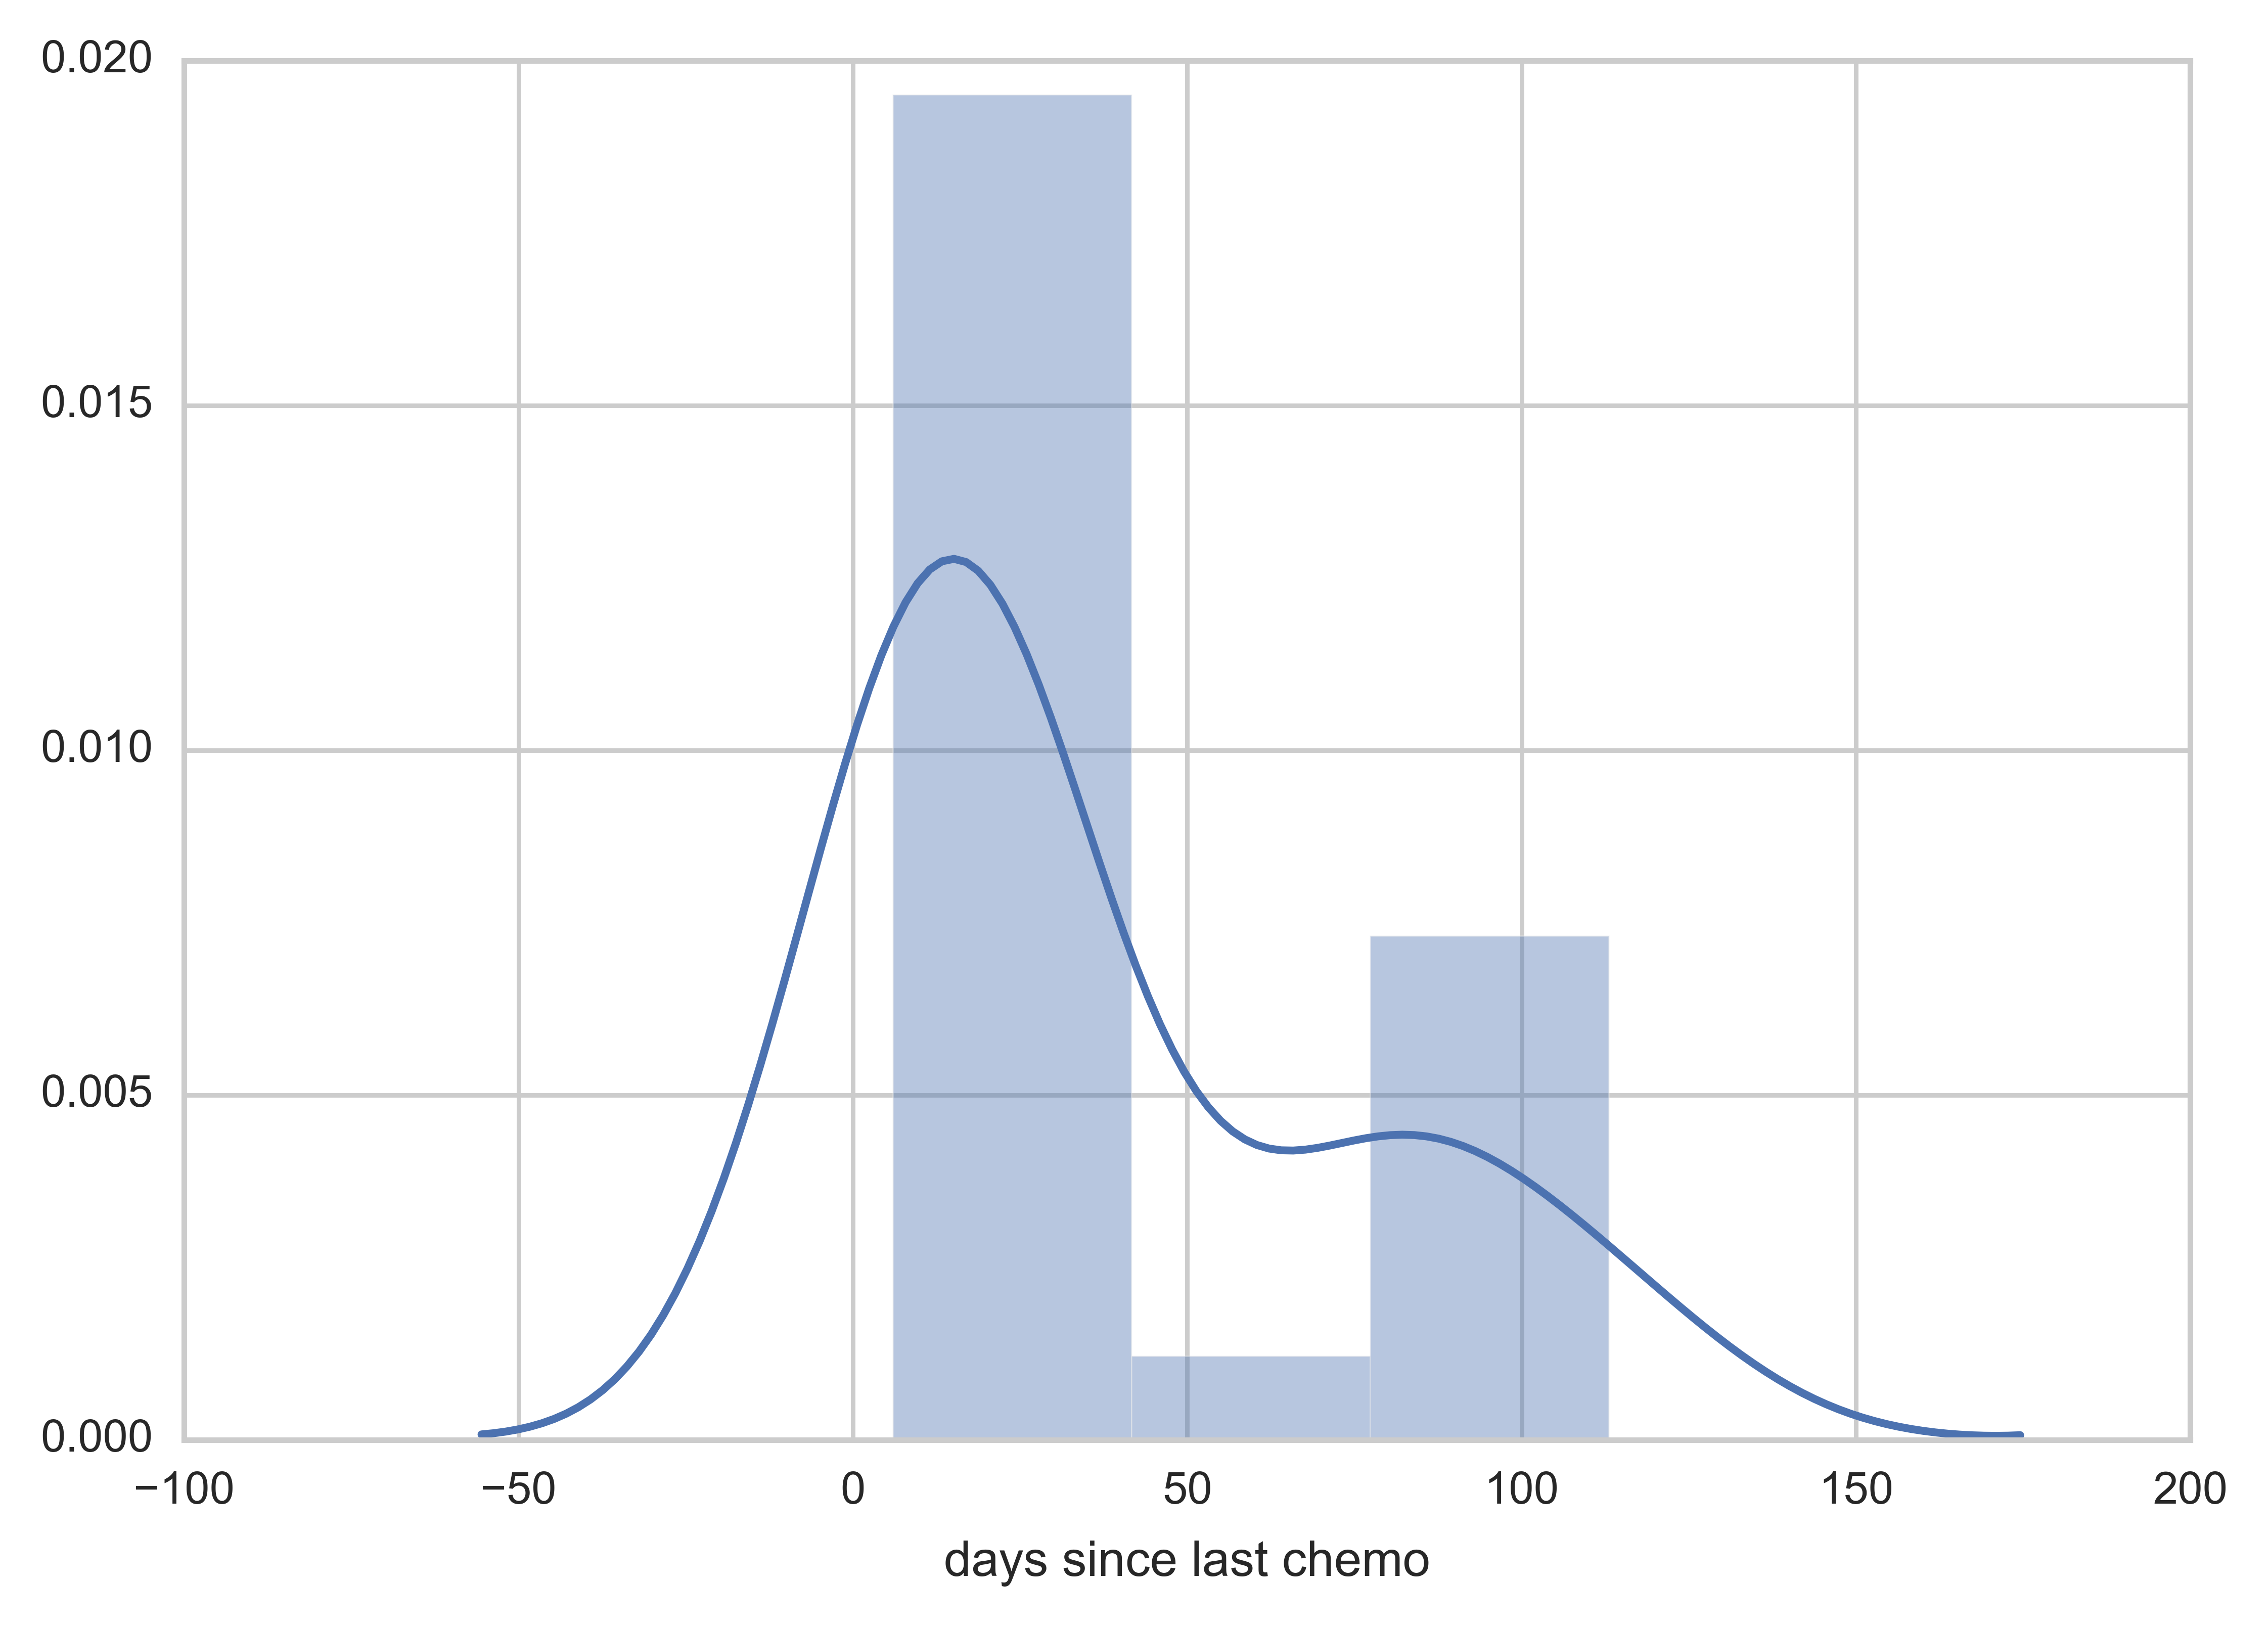

In [209]:
seaborn.distplot(new_cohort_df["days since last chemo"].dropna())

In [205]:
new_cohort_df.ix[new_cohort_df.donor == "AOCS-092"]

,source_id,RNA_id,RNA biospecimen,DNA_id,DNA_biospecimen,specimen_type_description,CollectionPoint,SpecimenType,RNA data file,DNA_sample_string,icgc_sample_id,project_code,submitted_sample_id,icgc_specimen_id,submitted_specimen_id,icgc_donor_id,submitted_donor_id,analyzed_sample_interval,percentage_cellularity,level_of_cellularity,study,study_specimen_involved_in,specimen_type,specimen_type_other,specimen_interval,...,gemcitabine,cyclophosphamide,topotecan,cisplatin,olaparib,docetaxel,bevacizumab,etoposide,nab-paclitaxel,farletuzumab/placebo,patient,days since last chemo,Rounds of carboplatin,Rounds of paclitaxel,Rounds of gemcitabine,Rounds of liposomal doxorubicin,Rounds of topotecan,Rounds of cyclophosphamide,Rounds of docetaxel,Rounds of farletuzumab/placebo,Rounds of etoposide,Rounds of cisplatin,Rounds of bevacizumab,Rounds of olaparib,total chemo rounds
source_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-092-1-6,AOCS-092-1-6,ICGCDBDE20131122027,AOCS-092-2-X,AOCS_092_ICGC_DBPC_20130205_061,AOCS-092-1-6,primary tumour,Primary,Tumour,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_092_IC...,ICGCDBPC20130205061,SA505676,OV-AU,AOCS-092-1-6,SP101628,AOCS-092-1,DO46374,AOCS-092,963.0,83.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,False,False,False,False,False,False,False,False,False,False,AOCS-092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
AOCS-092-3-3,AOCS-092-3-3,ICGCDBDE20131122028,AOCS-092-4-7,AOCS_092_ICGC_DBPC_20130205_059,AOCS-092-3-3,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_092_IC...,ICGCDBPC20130205059,SA505685,OV-AU,AOCS-092-3-3,SP101630,AOCS-092-13,DO46374,AOCS-092,63.0,89.0,>81%,NaN,NaN,Recurrent tumour - other,recurrent ascitic fluid,1370,...,True,False,True,True,False,True,False,True,False,False,AOCS-092,7.0,2.0,2.0,1.0,1.0,1.0,NaN,1.0,NaN,2.0,3.0,NaN,NaN,13.0


In [47]:
new_cohort_df[["cyclophosphamide", "Cyclophosphamide"]].sum()

cyclophosphamide    6.0
Cyclophosphamide    6.0
dtype: float64